<a href="https://colab.research.google.com/github/emkafie/Machine-Learning/blob/main/KUIS_1_2341720176_FARREL_MUCHAMMAD_KAFIE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [1]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [4]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Data Size
df.shape

(48842, 15)

In [6]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [8]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

#cek missing value standar (NaN)
print("Periksa nilai NaN standar:")
print(df.isnull().sum())
print("-" * 30)

#hitung jumlah '?'(placeholder) di setiap kolom
print("Periksa placeholder '?' untuk nilai yang hilang:")
missing_values = (df == '?').sum()
print(missing_values[missing_values > 0])

Periksa nilai NaN standar:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64
------------------------------
Periksa placeholder '?' untuk nilai yang hilang:
workclass         1836
occupation        1843
native-country     583
dtype: int64


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [10]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

#ubah '?' dengan NaN untuk memudahkan proses
df.replace('?', np.nan, inplace=True)

#imputasi dengan modus untuk setiap kolom
for col in ['workclass', 'occupation', 'native-country']:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

#cek missing value setelah imputation
print("Cek missing value setelah imputation:")
print(df.isnull().sum())

Cek missing value setelah imputation:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


/tmp/ipython-input-3033857633.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [11]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

#inspeksi nilai unik pada kolom 'income'
print("Nilai unik pada kolom 'income':")
print(df['income'].unique())
print("-" * 30)

#standarisasi nilai
df['income'] = df['income'].replace({'>50K.': '>50K', '<=50K.': '<=50K'})

#verifikasi hasil penyesuaian
print("\nNilai unik setelah penyesuaian:")
print(df['income'].unique())

Nilai unik pada kolom 'income':
['<=50K' '>50K' '<=50K.' '>50K.']
------------------------------

Nilai unik setelah penyesuaian:
['<=50K' '>50K']


# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

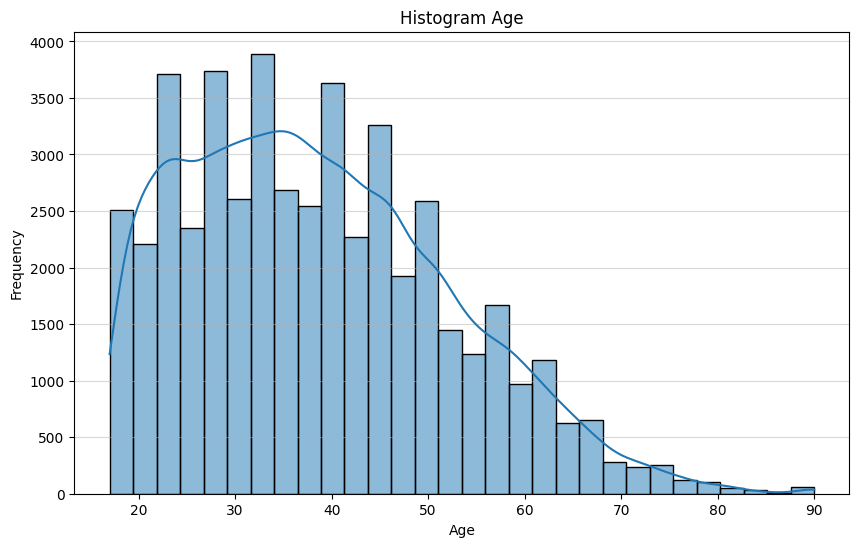

In [12]:
# Jawab 1.1 - Histrogram
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Histogram Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

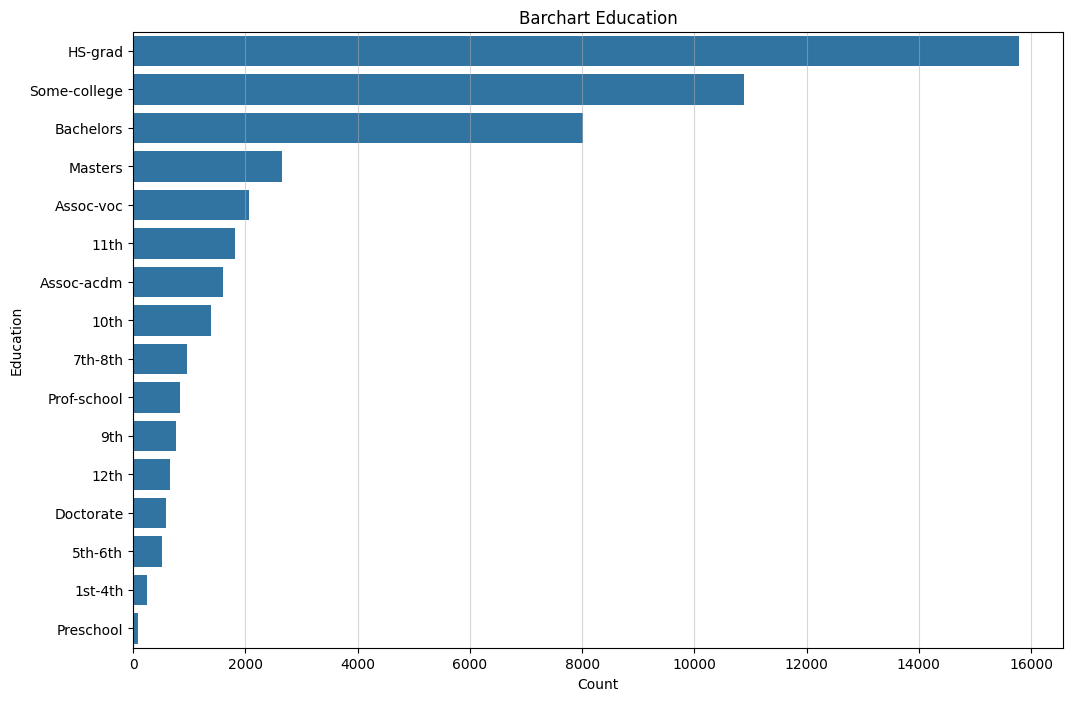

In [13]:
# Jawab 1.2 - Barchart
plt.figure(figsize=(12,8))
sns.countplot(data=df, y='education', order=df['education'].value_counts().index)
plt.title('Barchart Education')
plt.xlabel('Count')
plt.ylabel('Education')
plt.grid(axis='x', alpha=0.5)
plt.show()

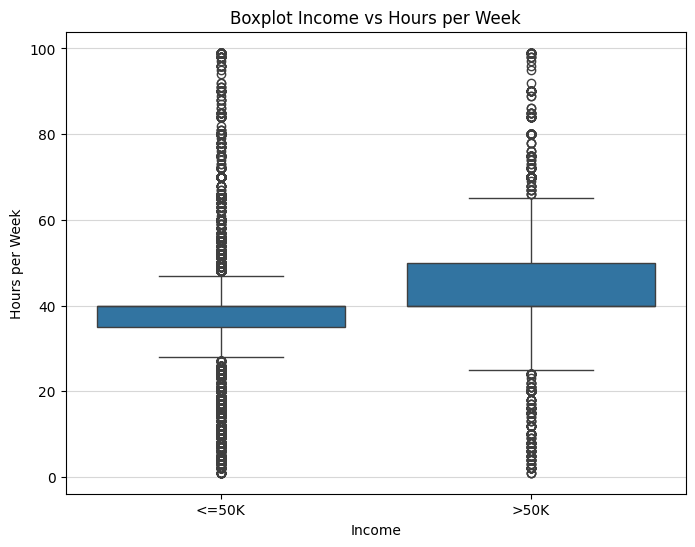

In [14]:
# Jawab 1.3 - Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='income', y='hours-per-week')
plt.title('Boxplot Income vs Hours per Week')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.grid(axis='y', alpha=0.5)
plt.show()

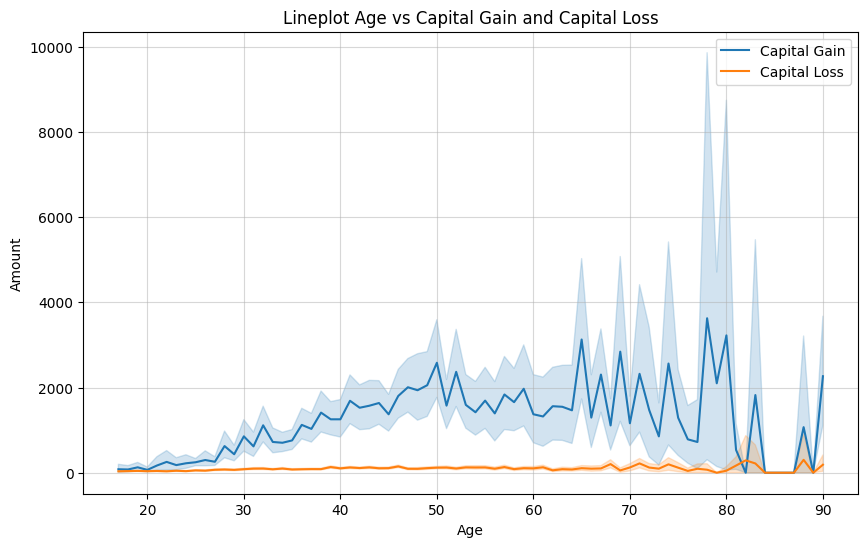

In [15]:
# Jawab 1.4 - Lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='age', y='capital-gain', label='Capital Gain')
sns.lineplot(data=df, x='age', y='capital-loss', label='Capital Loss')
plt.title('Lineplot Age vs Capital Gain and Capital Loss')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [16]:
# Jawab dengan komentar python

'''
1. Fenomena pada Distribusi 'age':
    Berdasarkan histogram, distribusi data 'age' menunjukkan fenomena Right-Skewed.
    Artinya, sebagian besar individu dalam dataset ini terkonsentrasi pada rentang usia muda sekita 20-45 tahun

2. Strategi Imputasi untuk 'age':
    Jika terdapat data yang hilnag pada 'age', strategi imputasi yang paling tepat adalah menggunakan MEDIAN.
    Karena distribusi data 'age' tidak simetris (skewed). Menggunkan MEAN akan terpengatuh oleh nilai-nilai
    ekstrem (usia yang sangat tua) di ekor kanan, sehingga hasilnya bisa menjadi bias.

3. Jumlah Outlier pada 'hours-per-week' per kategori 'income':
'''
for income_cat in df['income'].unique():
    subset = df[df['income'] == income_cat]['hours-per-week']
    q1 = subset.quantile(0.25)
    q3 = subset.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    num_outliers = len(outliers)
    print(f"Jumlah outlier pada kategori '{income_cat}': {num_outliers}")

'''
  Hasil Perhitungan Outlier:
  - Jumlah outlier untuk kategori income '<=50K': 11706
  - Jumlah outlier untuk kategori income '>50K': 781

  Kategori yang memilii outlier paling banyak adalah <=50K.Ini terlihat dari boxplot
  di mana banyak sekali titik data yang berada di luar whiskers plot
'''

Jumlah outlier pada kategori '<=50K': 11706
Jumlah outlier pada kategori '>50K': 781


"\n  Hasil Perhitungan Outlier:\n  - Jumlah outlier untuk kategori income '<=50K': \n  - Jumlah outlier untuk kategori income '>50K':\n\n  Kategori yang memilii outlier paling banyak adalah \n"

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [17]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

#encoding kolom 'sex' menggunakan map: Male=1 Female=0
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

#encoding kolom 'income' menggunakan map: <=50K=0 >50K=1
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

#tampilkan hasil untuk verifikasi
print("Hasil encoding pada 5 baris pertama:")
print(df[['sex', 'income']].head())

Hasil encoding pada 5 baris pertama:
   sex  income
0    1       0
1    1       0
2    1       0
3    1       0
4    0       0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

Matriks Korelasi:
                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income          0.230369       0.332613        0.227687      0.223013   

                capital-loss    income  
age                 0.056944  0.230369  
education-num       0.080972  0.332613  
hours-per-week      0.054467  0.227687  
capital-gain       -0.031441  0.223013  
capital-loss        1.000000  0.147554  
income              0.147554  1.000000  

------------------------------



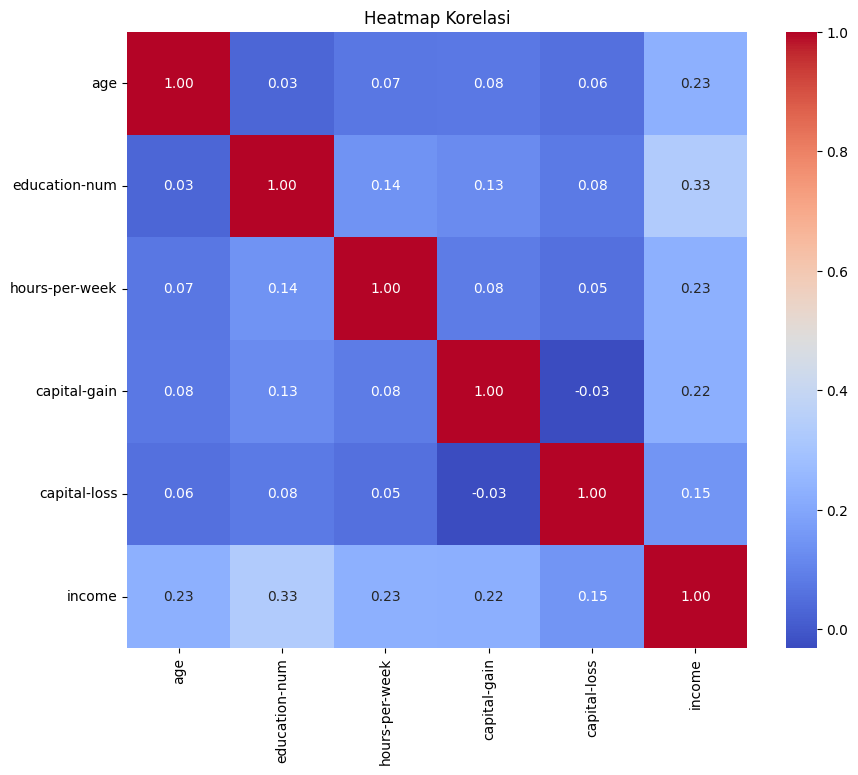

In [18]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

#pilih kolom yang akan dianalisis dan hitung matriks korelasinya
cols_for_corr = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
corr_matrix = df[cols_for_corr].corr()

#tampilkan matriks korelasi
print("Matriks Korelasi:")
print(corr_matrix)
print("\n" + "-" * 30 + "\n")

#visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

In [ ]:
# Hasil analisis jelaskan pada cell ini
'''
2. Interpretasi Hasil Korelasi:

Berdasarkan heatmap korelasi, terutama pada baris/kolom 'income', kita dapat menginterpretasikan:

- Korelasi Positif dengan Income:
  -> 'education-num' (0.33): Memiliki korelasi positif sedang. Artinya, semakin tinggi level pendidikan numerik seseorang, semakin besar kemungkinannya untuk memiliki pendapatan >50K.
  -> 'hours-per-week' (0.23): Memiliki korelasi positif. Orang yang bekerja lebih banyak jam per minggu cenderung memiliki pendapatan lebih tinggi.
  -> 'age' (0.23): Memiliki korelasi positif. Seiring bertambahnya usia, kemungkinan seseorang berpendapatan >50K juga cenderung meningkat.
  -> 'capital-gain' (0.22): Memiliki korelasi positif. Keuntungan modal yang lebih tinggi berhubungan dengan pendapatan yang lebih tinggi

- Korelasi Negatif dengan Income:
  -> 'capital-loss' (0.15): Meskipun positif, korelasinya cukup lemah. Ini menunjukkan bahwa kerugian modal memiliki hubungan yang tidak terlalu kuat dengan tingkat pendapatan secara keseluruhan dalam dataset ini.

- Kesimpulan:
   Variabel yang paling berpengaruh (secara linear) terhadap `income` adalah `education-num`. Variabel `age`, `hours-per-week`, dan `capital-gain` juga memiliki hubungan positif yang cukup berarti.
   Ini memberikan wawasan bahwa pendidikan, pengalaman (usia), dan jam kerja adalah faktor-faktor penting yang berkontribusi pada tingkat pendapatan.
'''

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [19]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


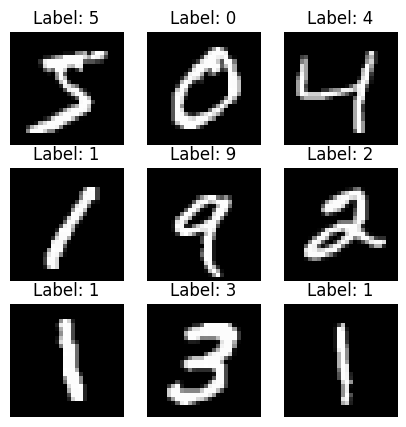

In [20]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Ukuran X_test setelah di-resize: (10000, 32, 32)


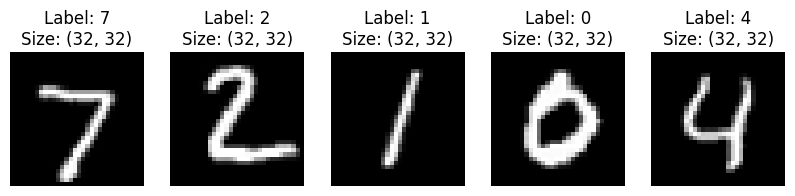

In [21]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import cv2

#list kosong untuk menampung hasil resize
X_test_resized = []

#iterasi pada setiap citra
for img in X_test:
    resized_img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_CUBIC)
    X_test_resized.append(resized_img)

#ubah list menjadi numpy array
X_test_resized = np.array(X_test_resized)

#cek ukuran array baru
print(f"Ukuran X_test setelah di-resize: {X_test_resized.shape}")

#tampilkan 5 citra pertama hasil upsampling
plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test_resized[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}\nSize: {X_test_resized[i].shape}")
    plt.axis("off")
plt.show()


## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [22]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

#normalisasi nilai piksel dengan membaginya dengan 255
#ubah tipe data menjadi float32 untuk presisi
X_test_normalized = X_test_resized.astype('float32') / 255.0

#cek nilai terkecil dan terbesar
print(f"Nilai piksel terkecil: {X_test_normalized.min()}")
print(f"Nilai piksel terbesar: {X_test_normalized.max()}")

#tampilkan salah satu nilai piksel dari citra pertama
print("\nNilai piksel citra pertama:")
print(X_test_normalized[0, 15:20, 15:20])

Nilai piksel terkecil: 0.0
Nilai piksel terbesar: 1.0

Nilai piksel citra pertama:
[[0.         0.         0.         0.         0.27058825]
 [0.         0.         0.         0.0627451  0.6431373 ]
 [0.         0.         0.         0.25882354 0.8235294 ]
 [0.         0.         0.         0.4627451  1.        ]
 [0.         0.         0.13725491 0.7607843  1.        ]]


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [23]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

#ubah (flatten) matriks 32x32 menjadi array 1 dimensi berukuran 1024
num_images = X_test_normalized.shape[0]
X_test_flattened = X_test_normalized.reshape(num_images, -1)

#cek ukuran array baru
print(f"Ukuran X_test setelah di-flatten: {X_test_normalized.shape}")
print(f"Ukuran X_test setelah di flatten: {X_test_flattened.shape}")

#tampilkan panjang darai vektor pertama
print(f"Panjang vektor untuk citra pertama: {len(X_test_flattened[0])}")

Ukuran X_test setelah di-flatten: (10000, 32, 32)
Ukuran X_test setelah di flatten: (10000, 1024)
Panjang vektor untuk citra pertama: 1024
